## Logistic Regression

<a target="_blank" href="https://animevyuh.org/logistic-regression/"> <img src="https://img.shields.io/badge/📖 Read blog post-9cf"></a>

### Sigmoid Function: Logistic Regression

$ {z} = (W*X) + b$

$ \hat{y}= 1/(1+e^{-z}) $

#### Import Necessary Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

#### Read the training and testing data

In [2]:
train_data = pd.read_csv("training_data.csv")
test_data = pd.read_csv("testing_data.csv")

In [3]:
train_data.shape

(25079, 18)

In [4]:
test_data.shape

(9330, 17)

In [5]:
train_data.head(10)

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,16201,47,8433,DX2,60,21.655523,NO,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
1,9421,3,2972,DX6,2,28.852743,NO,RURAL,Stable,1.0,0.0,1.0,0.0,1.0,0.0,0.0,3.0,0
2,16205,7,8608,Dx6,20,26.179725,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
3,5582,31,10074,dx6,8,22.638945,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
4,20880,43,7462,dx1,53,21.326131,NO,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
5,7895,51,848,dx1 dx3 dx4,20,23.438528,NO,RURAL,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,1
6,17785,49,6663,DX5,5,23.882432,NO,RURAL,Stable,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,1
7,343,35,248,dx2,45,17.059734,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
8,11729,36,8098,dx6,43,22.182933,YES,RURAL,Stable,1.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0
9,15319,15,10018,DX6,60,17.956259,NO,RURAL,Stable,1.0,1.0,1.0,0.0,0.0,0.0,0.0,3.0,0


We need to predict whether the patient survived or not based on the dataset. 0=Not Survived 1=Survived

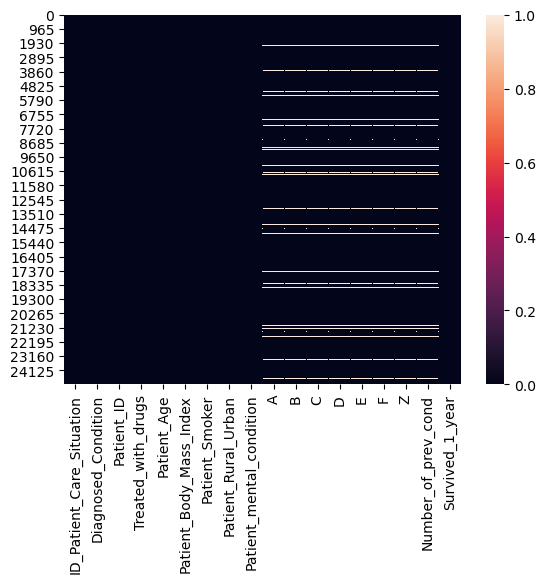

In [6]:
sns.heatmap(train_data.isnull())
plt.show()

I have already performed EDA on this dataset. But you guys can open a pull request, the EDA with best analysis will be merged 

In [7]:
features = ["Patient_Age","Patient_Body_Mass_Index","Patient_Smoker","Diagnosed_Condition","Patient_mental_condition","Treated_with_drugs"]

In [8]:
X = train_data[features]
Y = train_data['Survived_1_year'] 
X_copy = X.copy()
Y_copy = Y.copy()

In [9]:
Y.unique()

array([1, 0])

In [10]:
X.isnull().sum()

Patient_Age                 0
Patient_Body_Mass_Index     0
Patient_Smoker              0
Diagnosed_Condition         0
Patient_mental_condition    0
Treated_with_drugs          8
dtype: int64

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_Age               25079 non-null  int64  
 1   Patient_Body_Mass_Index   25079 non-null  float64
 2   Patient_Smoker            25079 non-null  object 
 3   Diagnosed_Condition       25079 non-null  int64  
 4   Patient_mental_condition  25079 non-null  object 
 5   Treated_with_drugs        25071 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [12]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25079 entries, 0 to 25078
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_Age               25079 non-null  int64  
 1   Patient_Body_Mass_Index   25079 non-null  float64
 2   Patient_Smoker            25079 non-null  object 
 3   Diagnosed_Condition       25079 non-null  int64  
 4   Patient_mental_condition  25079 non-null  object 
 5   Treated_with_drugs        25071 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 1.1+ MB


In [13]:
#scale and encode the numerical and categorical data types respectively.
numerical = list()
categorical = list()
for col in X.columns:
    if X[col].dtype == "O":
        categorical.append(col)
    else:
        numerical.append(col)

In [14]:
X[numerical].isnull().sum()

Patient_Age                0
Patient_Body_Mass_Index    0
Diagnosed_Condition        0
dtype: int64

In [15]:
X[categorical].sample(10)

,Patient_Smoker,Patient_mental_condition,Treated_with_drugs
1038,YES,Stable,DX2
9649,NO,Stable,DX3
14844,NO,Stable,DX6
13921,NO,Stable,DX6
20359,YES,Stable,DX4
21704,NO,Stable,dx6
16568,NO,Stable,DX3
20571,NO,Stable,DX6
21069,NO,Stable,DX6
11999,YES,Stable,DX4


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.impute import SimpleImputer

le = LabelEncoder()
minmaxsc = MinMaxScaler()


X[numerical] = minmaxsc.fit_transform(X[numerical])
X[categorical] = X[categorical].astype(str)

for col in categorical:
    X[col] = le.fit_transform(X[col])

In [17]:
X

,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Diagnosed_Condition,Patient_mental_condition,Treated_with_drugs
0,0.422535,0.711381,4,0.903846,0,31
1,0.014085,0.960331,4,0.057692,0,61
2,0.140845,0.867872,4,0.134615,0,120
3,0.056338,0.745397,4,0.596154,0,181
4,0.373239,0.699987,4,0.826923,0,122
...,...,...,...,...,...,...
25074,0.232394,0.682664,5,0.038462,0,109
25075,0.422535,0.746811,6,0.403846,0,32
25076,0.359155,0.652457,6,0.346154,0,57
25077,0.147887,0.677683,4,0.076923,0,178


In [18]:
x_train,x_val,y_train,y_val = train_test_split(X_copy,Y_copy,train_size=0.8,random_state=42)

In [19]:
model = LogisticRegression()
model.fit(x_train,y_train)
predict = model.predict(x_val)
model.score(x_train,y_train)

ValueError: could not convert string to float: 'NO'

In [32]:
model.score(x_val,y_val)

NotFittedError: This LogisticRegression instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.